In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [3]:
data = pd.read_csv("data_84.csv")
data.corr()

,cluster,year,n,pct_is_new,pct_is_newish,pct_dusted_ccn,pct_dusted_rmcl,biggest_anc,n_biggest_anc,pct_in_biggest_anc,...,rcr_hi,human,animal,molecular_cellular,is_clinical,is_research_article,cited_by_clin,nih,rage,class
cluster,1.000000,0.193755,-0.562190,0.149279,0.084211,NaN,0.039007,0.988527,-0.552271,-0.374136,...,-0.611772,-0.004522,0.003613,-0.052164,-0.138156,0.190256,-0.256781,-0.377695,0.174621,-0.194837
year,0.193755,1.000000,0.100737,-0.117138,-0.144214,NaN,-0.019670,0.190578,0.102075,0.163564,...,-0.104237,0.269031,-0.308657,-0.134505,0.261155,-0.441399,0.392533,-0.064701,0.214844,0.000903
n,-0.562190,0.100737,1.000000,-0.027809,0.012261,NaN,-0.054631,-0.546295,0.981475,0.187188,...,0.584816,-0.123604,0.030630,0.203033,0.092037,-0.225278,0.203469,0.475616,-0.282019,0.150632
pct_is_new,0.149279,-0.117138,-0.027809,1.000000,0.976116,NaN,0.251878,0.215096,-0.032792,-0.746508,...,0.378865,0.019019,-0.120265,0.080392,0.075652,-0.372896,-0.018382,0.035355,-0.409543,0.404863
pct_is_newish,0.084211,-0.144214,0.012261,0.976116,1.000000,NaN,0.247755,0.142449,0.010153,-0.734460,...,0.435189,0.037075,-0.139379,0.071675,0.080380,-0.381442,0.004338,0.030853,-0.434893,0.434149
pct_dusted_ccn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_dusted_rmcl,0.039007,-0.019670,-0.054631,0.251878,0.247755,NaN,1.000000,0.045130,-0.053490,-0.225063,...,0.071268,-0.009889,0.065630,-0.051576,0.075111,-0.099472,0.002934,-0.052521,-0.015262,0.080429
biggest_anc,0.988527,0.190578,-0.546295,0.215096,0.142449,NaN,0.045130,1.000000,-0.544059,-0.423155,...,-0.584553,-0.012549,0.004728,-0.037649,-0.122027,0.162828,-0.244093,-0.374160,0.158408,-0.172141
n_biggest_anc,-0.552271,0.102075,0.981475,-0.032792,0.010153,NaN,-0.053490,-0.544059,1.000000,0.163349,...,0.570246,-0.123502,0.026568,0.205971,0.092368,-0.218956,0.198394,0.471033,-0.286782,0.151641
pct_in_biggest_anc,-0.374136,0.163564,0.187188,-0.746508,-0.734460,NaN,-0.225063,-0.423155,0.163349,1.000000,...,-0.101703,0.095702,-0.021137,-0.123315,0.058176,0.087284,0.157572,0.050984,0.251307,-0.254164


In [4]:
dd = pd.concat([data2, data3], axis=0)
dd = pd.concat([dd, data4], axis=0)
print(len(dd)," ",len(data2)," ",len(data3)," ", len(data4))
dd.corr()
ddh = dd[dd['pred_log'] > 0.70]

63939   22228   21197   20514


In [5]:
print(len(d1[d1['human'] >= 0.020]))
print(d1['human'].mean())
print(d0['human'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['human'].mean())

139
0.6615782889190448
0.4992861269431743
0.7985500906961734


In [6]:
print(len(d1))
print(len(d1[d1['cited_by_clin'] >= 0.1]))
print(d1['cited_by_clin'].mean())
print(d0['cited_by_clin'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['cited_by_clin'].mean())
print(len(d[d['cited_by_clin'] < 0.1]))

139
129
0.3139763005804777
0.19447812104544823
0.3002365114722526
755


In [35]:
print(len(d1[d1['rcr_hi'] > 2.50]))
print(d1['rcr_hi'].mean())
print(d0['rcr_hi'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['rcr_hi'].mean())
print(len(d[d['rcr_hi'] <= 2.00]))

117
3.360497019995197
2.5996143195839845
3.0720042366859865
945


In [43]:
print(len(d1[d1['pct_is_new'] <= 0.50]))
print(d1['pct_is_new'].median())
print(d0['pct_is_new'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_is_new'].median())
print(len(d[d['pct_is_new'] > 0.50]))

124
0.191511387163561
0.08446150930062704
0.259259259259259
503


In [9]:
print(d1['pct_is_newish'].median())
print(d0['pct_is_newish'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_is_newish'].median())

0.181515957446809
0.07999358839235525
0.235321695485508


In [10]:
print(len(d1[d1['n_biggest_anc'] >= 300]))
print(d1['n_biggest_anc'].median())
print(d0['n_biggest_anc'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['n_biggest_anc'].median())

120
2669.0
2065.0
661.5


In [11]:
print(d1['pct_of_biggest_anc'].median())
print(d0['pct_of_biggest_anc'].median())
d = data2[data2['pred_log'] > 0.75]
print(d['pct_of_biggest_anc'].median())

0.948643410852713
0.9622801199532045
0.8955495748851026


In [12]:
print(len(d1[d1['rage'] >= 5.00]))

print(d1['rage'].min())
print(d0['rage'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['rage'].median())
print(len(d[d['rage'] < 5]))

df = d1[d1['rage'] >= 5.00]
print(df.tail(20))

122
3.42451246635554
7.676822355712575
4.751392716077815
2564
     cluster  year     n  pct_is_new  pct_is_newish  pct_dusted_ccn  \
236     8803  2014   381    0.551181       0.404199               0   
239      280  2014  5899    0.093745       0.092728               0   
244      315  2014  5716    0.199265       0.180196               0   
248     1436  2015  3135    0.101116       0.086124               0   
250     1693  2015  2822    0.132176       0.117647               0   
256     4054  2015  1335    0.457678       0.343071               0   
257      750  2015  4279    0.264080       0.266651               0   
259     4337  2016  1302    0.157450       0.133641               0   
261      314  2016  6001    0.143809       0.134478               0   
263      319  2017  6072    0.147563       0.135870               0   
265      235  2017  6508    0.583743       0.398125               0   
269      698  2017  4717    0.043672       0.041976               0   
271     2623  2

In [47]:
print(len(d1[d1['is_clinical'] >= 0.020]))
print(d1['is_clinical'].mean())
print(d0['is_clinical'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['is_clinical'].mean())
print(len(d[d['is_clinical'] < 0.015]))

118
0.10439275034131415
0.03158050066749413
0.07969805140048392
740


In [14]:
#print(len(data[data['rcr_mid'] >= 0.045]))
print(d1['rcr_mid'].median())
print(d0['rcr_mid'].median())
d = data2[data2['pred_log'] > 0.75]
print(d['rcr_mid'].median())

0.689622332432986
0.6070329053518465
0.664509997248611


In [15]:
print(d1['pct_top_5_anc'].median())
print(d0['pct_top_5_anc'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_top_5_anc'].median())

0.970748898678414
0.983296130952381
0.9515902037117066


In [16]:
print(len(d1[d1['animal'] >= 0.020]))
print(d1['animal'].median())
print(d0['animal'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['animal'].median())
print(len(d[d['animal'] < 0.020]))

122
0.0857692307692308
0.141416102841678
0.0205392033542977
2071


In [17]:
print(d1['is_research_article'].median())
print(d0['is_research_article'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['is_research_article'].median())

0.761996161228407
0.890601325212548
0.7658616795110285


In [26]:
print(len(d1[d1['wrcr'] >= 700]))
print(d1['wrcr'].median())
print(d0['wrcr'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['wrcr'].median())
print(len(d[d['wrcr'] < 700]))

114
3684.19651326051
1902.839315958975
789.0962646656735
2041


In [234]:
print(len(d1[d1['molecular_cellular'] >= 0.03]))
print(d1['molecular_cellular'].median())
print(d0['molecular_cellular'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['molecular_cellular'].median())

125
0.183814046488378
0.1166807091749025
0.02828744374176035


In [193]:
print(len(d1[d1['nih'] >= 0.025]))
print(d1['nih'].median())
print(d0['nih'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['nih'].median())
print(len(d[d['nih'] < 0.025]))

133
0.104443521594684
0.070151989583813
0.07594585871060089
792


In [166]:
print(len(d1[d1['rcr_low'] == 0]))
print(d1['rcr_low'].median())
print(d0['rcr_low'].median())

18
0.0988292416525234
0.0794700648749535


In [320]:

dm = d1[d1['rcr_hi'] >= 2.55]
print(len(dm))
#dm = dm[dm['wrcr'] >= 500]
dm = dm[dm['cited_by_clin'] >= 0.10]
print(len(dm))
    #x_test = x_test[x_test['is_clinical'] >= 0.015] ##this one
    

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]

117
109


23
actual len  5202
len of xtest  357
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1978
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7200840825840825
(357,)
no of positive  250
len of predy  154


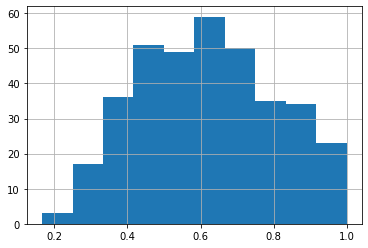

$$$  357   154
total positive  154
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5442
len of xtest  386
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1979
[1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
c

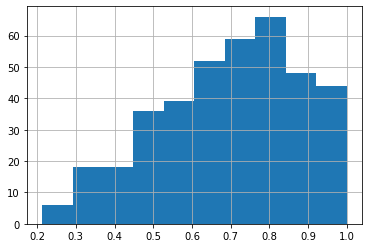

$$$  386   239
total positive  239
tp tn fp fn 0   0   1   0
year  1979 positive  0
actual len  5711
len of xtest  396
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1980
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

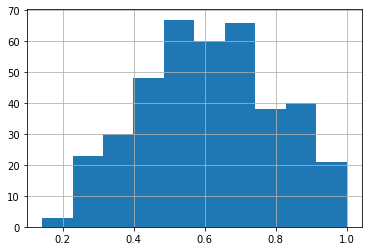

$$$  396   170
total positive  170
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  5986
len of xtest  459
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1981
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

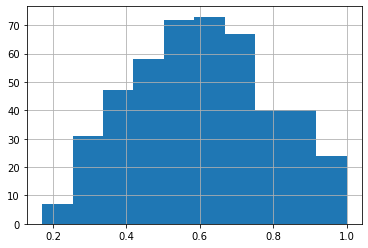

$$$  459   192
total positive  192
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  6266
len of xtest  485
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1982
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

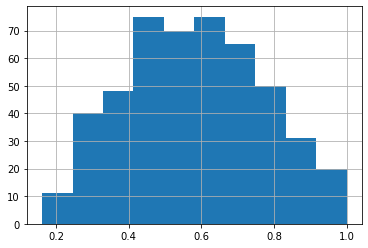

$$$  485   180
total positive  180
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6553
len of xtest  533
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1983
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

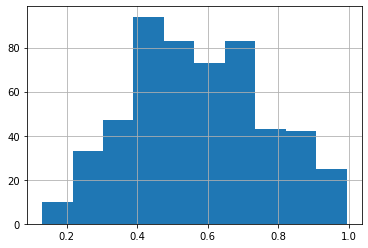

$$$  533   193
total positive  193
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  6814
len of xtest  565
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1984
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

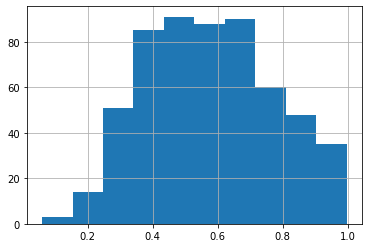

$$$  565   205
total positive  205
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  7177
len of xtest  598
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1985
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

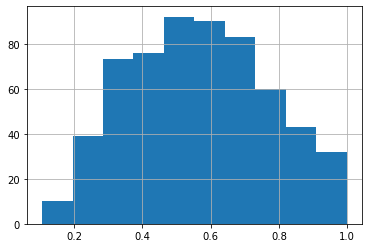

$$$  598   209
total positive  209
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7513
len of xtest  673
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1986
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

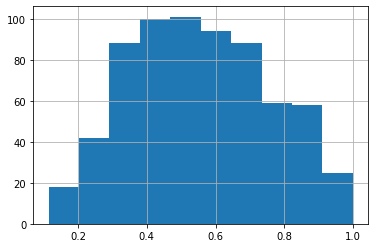

$$$  673   227
total positive  227
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  7919
len of xtest  696
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1987
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

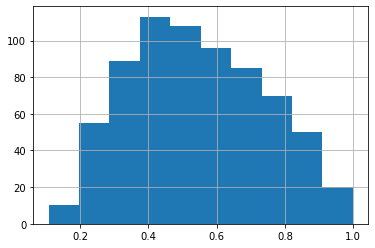

$$$  696   214
total positive  214
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  8264
len of xtest  728
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1988
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

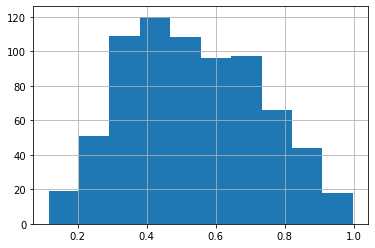

$$$  728   222
total positive  222
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  8697
len of xtest  760
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1989
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

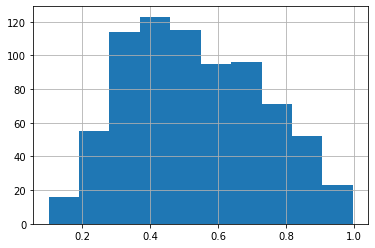

$$$  760   224
total positive  224
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  9078
len of xtest  819
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1990
[1979 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
c

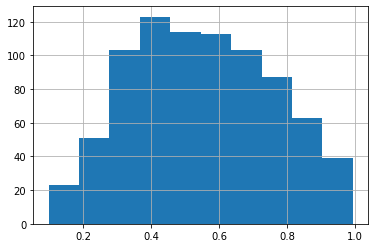

$$$  819   272
total positive  272
tp tn fp fn 1   1   0   0
year  1990 positive  1
actual len  9454
len of xtest  853
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1991
[1979 1990 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
c

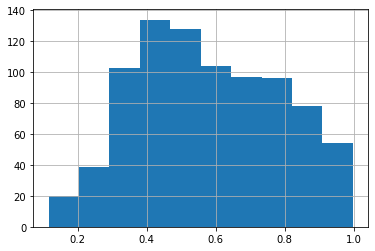

$$$  853   322
total positive  322
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  9811
len of xtest  897
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1992
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

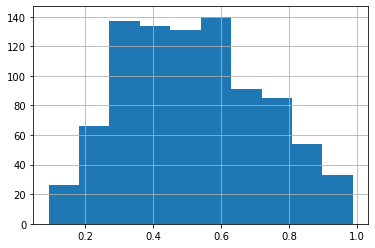

$$$  897   246
total positive  246
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  10147
len of xtest  963
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1993
[1979 1990 1991 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]


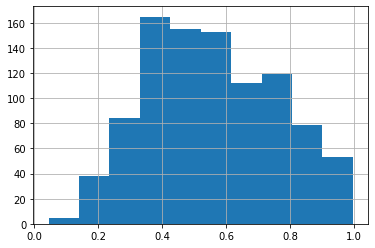

$$$  963   327
total positive  327
tp tn fp fn 1   0   0   0
year  1993 positive  1
actual len  10562
len of xtest  1026
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1994
[1979 1990 1991 1993 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]

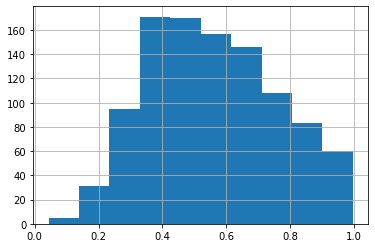

$$$  1026   346
total positive  346
tp tn fp fn 2   1   0   0
year  1994 positive  2
actual len  11060
len of xtest  1118
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1995
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

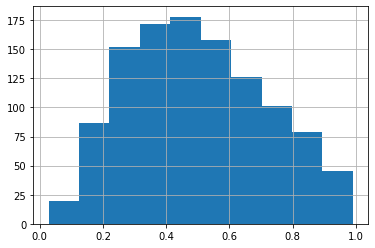

$$$  1118   285
total positive  285
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  11465
len of xtest  1167
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1996
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

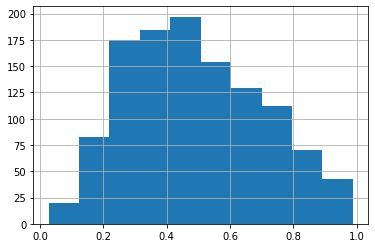

$$$  1167   293
total positive  293
tp tn fp fn 0   0   0   0
year  1996 positive  0
actual len  11872
len of xtest  1231
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1997
[1979 1990 1991 1993 1994 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

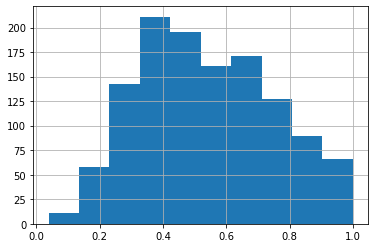

$$$  1231   382
total positive  382
tp tn fp fn 1   0   0   0
year  1997 positive  1
actual len  12265
len of xtest  1303
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1998
[1979 1990 1991 1993 1994 1997 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

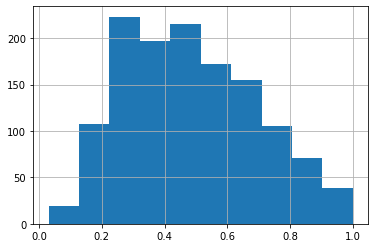

$$$  1303   320
total positive  320
tp tn fp fn 0   0   0   1
year  1998 positive  1
actual len  12697
len of xtest  1349
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1999
[1979 1990 1991 1993 1994 1997 1998 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

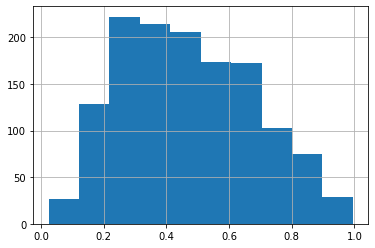

$$$  1349   302
total positive  302
tp tn fp fn 1   1   0   1
year  1999 positive  2
actual len  13164
len of xtest  1379
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   2000
[1979 1990 1991 1993 1994 1997 1998 1999 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

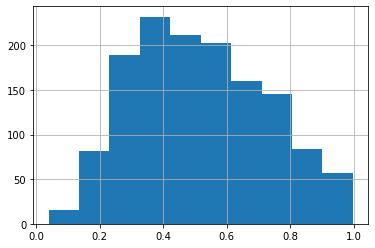

$$$  1379   372
total positive  372
tp tn fp fn 1   1   0   1
year  2000 positive  2
actual len  13742
len of xtest  1425
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2001
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

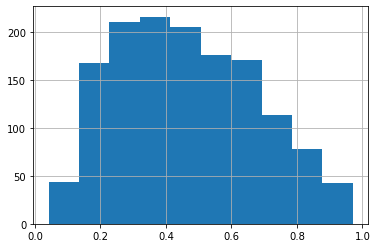

$$$  1425   305
total positive  305
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  14273
len of xtest  1454
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2002
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

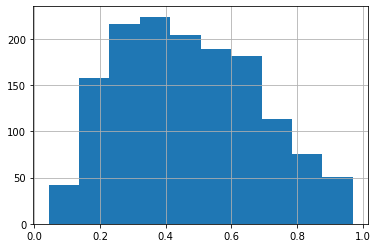

$$$  1454   314
total positive  314
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  14913
len of xtest  1491
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2003
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

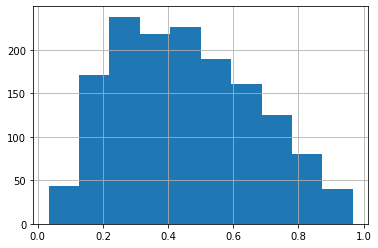

$$$  1491   301
total positive  301
tp tn fp fn 0   0   0   0
year  2003 positive  0
actual len  15526
len of xtest  1527
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2004
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

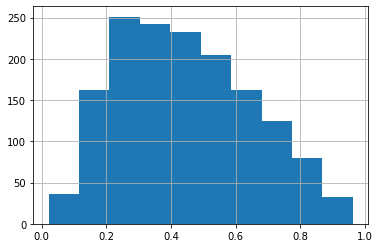

$$$  1527   288
total positive  288
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  16147
len of xtest  1561
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2005
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

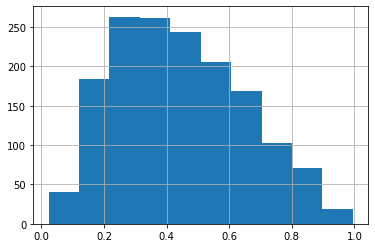

$$$  1561   277
total positive  277
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  16741
len of xtest  1613
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   2006
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

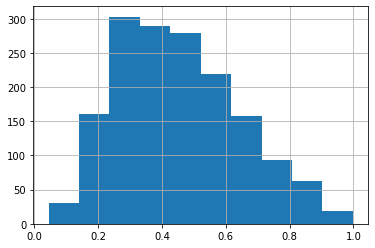

$$$  1613   274
total positive  274
tp tn fp fn 2   2   0   0
year  2006 positive  2
actual len  17387
len of xtest  1623
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  224
year   2007
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

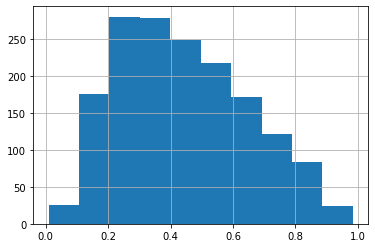

$$$  1623   302
total positive  302
tp tn fp fn 3   1   0   0
year  2007 positive  3
actual len  17998
len of xtest  1648
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   2008
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

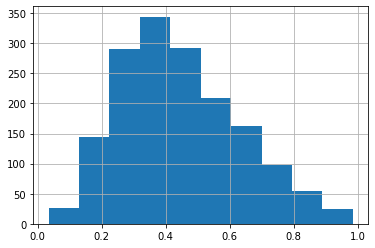

$$$  1648   256
total positive  256
tp tn fp fn 1   0   0   0
year  2008 positive  1
actual len  18746
len of xtest  1687
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  220
year   2009
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019

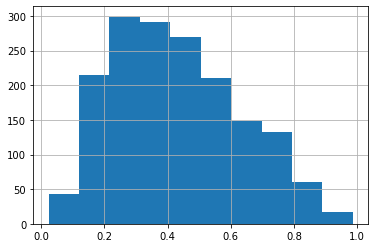

$$$  1687   275
total positive  275
tp tn fp fn 6   1   2   1
year  2009 positive  7
actual len  19487
len of xtest  1713
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  216
year   2010
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2011
 2012 2013 2014 2015 2016 2017 2018 2019

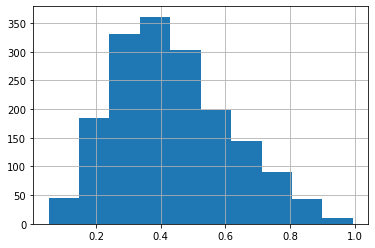

$$$  1713   223
total positive  223
tp tn fp fn 6   5   1   3
year  2010 positive  9
actual len  20289
len of xtest  1768
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  203
year   2011
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2012 2013 2014 2015 2016 2017 2018 2019

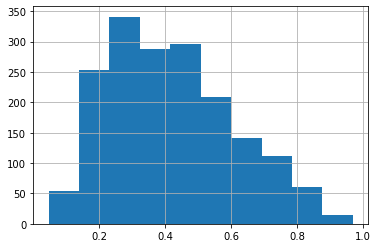

$$$  1768   249
total positive  249
tp tn fp fn 11   6   2   3
year  2011 positive  14
actual len  21155
len of xtest  1795
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  215
year   2012
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2013 2014 2015 2016 2017 2018 20

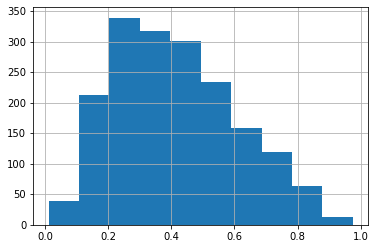

$$$  1795   247
total positive  247
tp tn fp fn 5   4   1   3
year  2012 positive  8
actual len  22085
len of xtest  1866
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  218
year   2013
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2014 2015 2016 2017 2018 2019

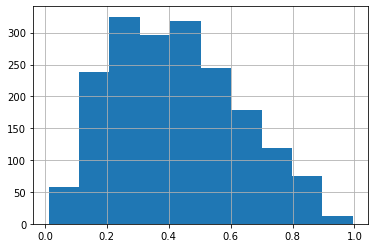

$$$  1866   290
total positive  290
tp tn fp fn 8   4   1   0
year  2013 positive  8
actual len  23101
len of xtest  1956
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  213
year   2014
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2015 2016 2017 2018 2019

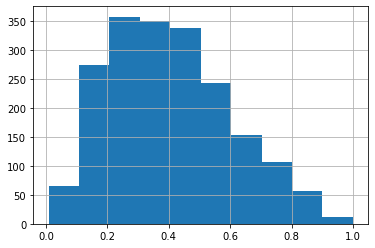

$$$  1956   245
total positive  245
tp tn fp fn 7   3   0   4
year  2014 positive  11
actual len  24194
len of xtest  2005
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  223
year   2015
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2016 2017 2018 201

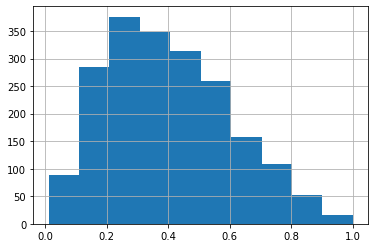

$$$  2005   259
total positive  259
tp tn fp fn 1   2   0   3
year  2015 positive  4
actual len  25290
len of xtest  2058
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  222
year   2016
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2017 2018 2019

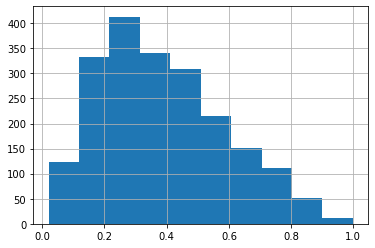

$$$  2058   263
total positive  263
tp tn fp fn 2   3   2   5
year  2016 positive  7
actual len  26499
len of xtest  2119
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  226
year   2017
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2018 2019

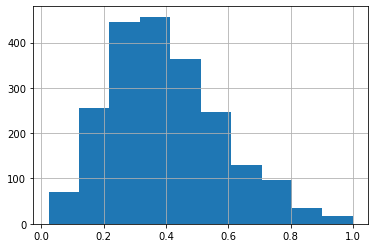

$$$  2119   213
total positive  213
tp tn fp fn 3   0   1   2
year  2017 positive  5
actual len  27875
len of xtest  2186
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  222
year   2018
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2019

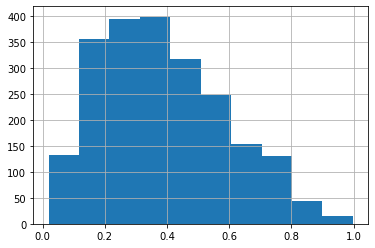

$$$  2186   271
total positive  271
tp tn fp fn 2   1   1   3
year  2018 positive  5
actual len  29230
len of xtest  2305
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  228
year   2019
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

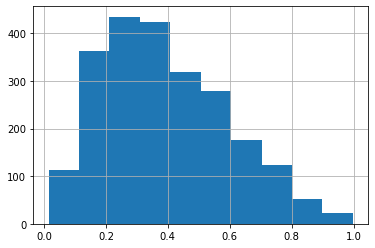

$$$  2305   296
total positive  296
tp tn fp fn 0   3   0   2
year  2019 positive  2
actual len  30564
len of xtest  2411
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2020
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

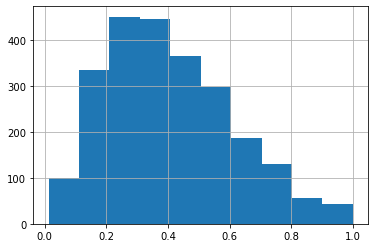

$$$  2411   337
total positive  337
tp tn fp fn 0   0   0   0
year  2020 positive  0
total pos  96  true pos  64  total false pos  263.1860465116279  mean cv  0.7201083219106474


In [4]:
##logistic regression: unified model for all
def recall2(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    
    '''x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model,scores.mean()
    
tot,tp,total_fp = 0,0,0
yr = 1978
x = pd.read_csv("data_84.csv")
x = x['year'].unique()
print(len(x))
CV = 0
while yr <= 2020:
#for yr in x:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_dccites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    #x_test = x_test[x_test['is_clinical'] >= 0.010] ##this one
    x_test = x_test[x_test['animal'] >= 0.01]

    x_test = x_test[x_test['molecular_cellular'] >= 0.020] ##this one, with C = 1
    #x_test = x_test[x_test['nih'] >= 0.020]
    x_test = x_test[x_test['human'] >= 0.20]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    print(x_test.dtypes)
    '''x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    '''
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model,cv = train(x_train)
    CV += cv
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.65]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.65]))
    a, b,c = recall(copy_test,0.65, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43," mean cv ",CV/43)

actual len  8714
len of xtest  4303
hdhdhd before  223
len of xtrain  219
year   1978
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4303,)
no of positive  1619
len of predy  684


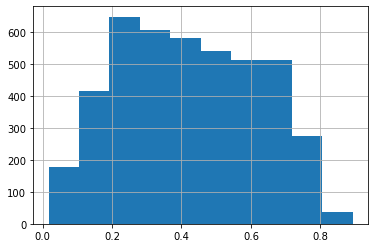

$$$  4303   684
total positive  684
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  9064
len of xtest  4522
hdhdhd before  223
len of xtrain  218
year   1979
[1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7723212898212898
(4522,)
no of positive  1510
len of predy  477


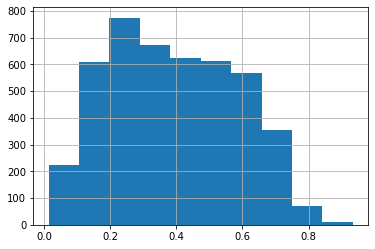

$$$  4522   477
total positive  477
tp tn fp fn 0   0   0   1
year  1979 positive  1
actual len  9441
len of xtest  4677
hdhdhd before  223
len of xtrain  219
year   1980
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4677,)
no of positive  1765
len of predy  685


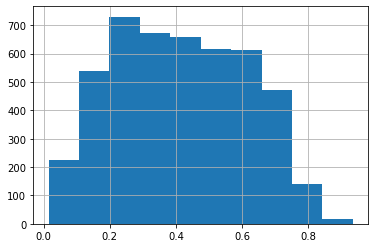

$$$  4677   685
total positive  685
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  9864
len of xtest  4855
hdhdhd before  223
len of xtrain  219
year   1981
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4855,)
no of positive  1794
len of predy  811


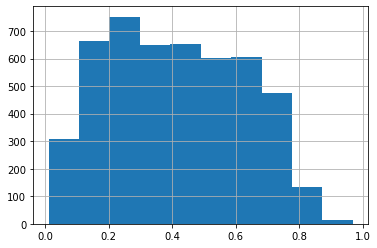

$$$  4855   811
total positive  811
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  10210
len of xtest  5115
hdhdhd before  223
len of xtrain  219
year   1982
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5115,)
no of positive  1957
len of predy  891


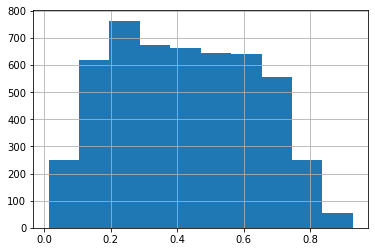

$$$  5115   891
total positive  891
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  10637
len of xtest  5290
hdhdhd before  223
len of xtrain  219
year   1983
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5290,)
no of positive  1951
len of predy  840


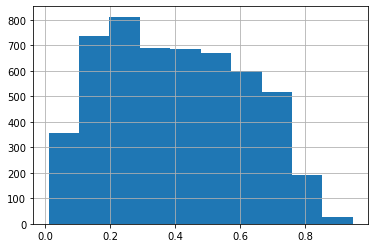

$$$  5290   840
total positive  840
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  11077
len of xtest  5538
hdhdhd before  223
len of xtrain  219
year   1984
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5538,)
no of positive  1946
len of predy  732


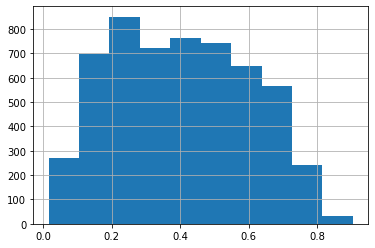

$$$  5538   732
total positive  732
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  11539
len of xtest  5729
hdhdhd before  223
len of xtrain  219
year   1985
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5729,)
no of positive  1890
len of predy  704


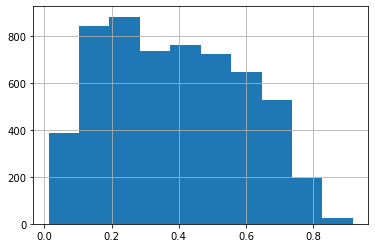

$$$  5729   704
total positive  704
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  12054
len of xtest  6003
hdhdhd before  223
len of xtrain  219
year   1986
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6003,)
no of positive  1720
len of predy  550


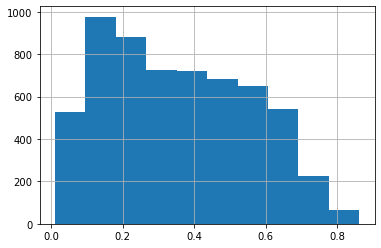

$$$  6003   550
total positive  550
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  12580
len of xtest  6317
hdhdhd before  223
len of xtrain  219
year   1987
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6317,)
no of positive  1554
len of predy  328


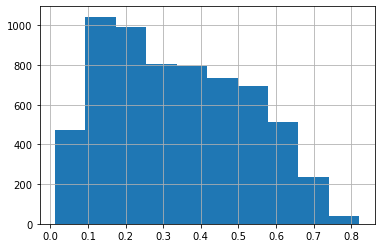

$$$  6317   328
total positive  328
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  13150
len of xtest  6609
hdhdhd before  223
len of xtrain  219
year   1988
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6609,)
no of positive  1622
len of predy  353


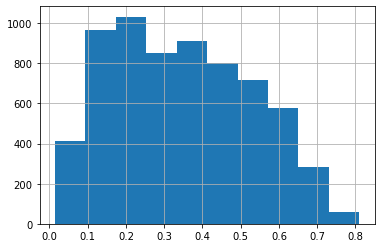

$$$  6609   353
total positive  353
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  13783
len of xtest  6819
hdhdhd before  223
len of xtrain  219
year   1989
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6819,)
no of positive  2162
len of predy  763


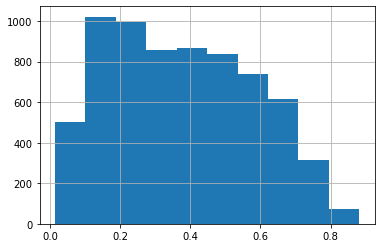

$$$  6819   763
total positive  763
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  14399
len of xtest  7133
hdhdhd before  223
len of xtrain  219
year   1990
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(7133,)
no of positive  2437
len of predy  983


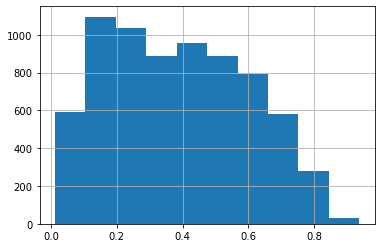

$$$  7133   983
total positive  983
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  15057
len of xtest  7484
hdhdhd before  223
len of xtrain  217
year   1991
[1979 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.763443500943501
(7484,)
no of positive  2519
len of predy  1037


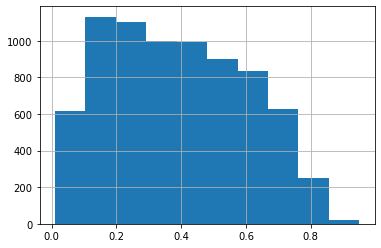

$$$  7484   1037
total positive  1037
tp tn fp fn 0   1   0   1
year  1991 positive  1
actual len  15614
len of xtest  7753
hdhdhd before  223
len of xtrain  217
year   1992
[1979 1991 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7679889554889555
(7753,)
no of positive  2258
len of predy  755


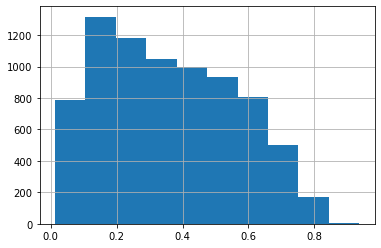

$$$  7753   755
total positive  755
tp tn fp fn 1   1   0   0
year  1992 positive  1
actual len  16286
len of xtest  7982
hdhdhd before  223
len of xtrain  217
year   1993
[1979 1991 1992 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.763443500943501
(7982,)
no of positive  3010
len of predy  1512


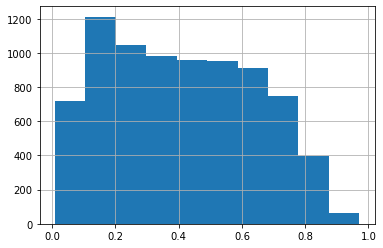

$$$  7982   1512
total positive  1512
tp tn fp fn 0   1   0   1
year  1993 positive  1
actual len  16911
len of xtest  8301
hdhdhd before  223
len of xtrain  218
year   1994
[1979 1991 1992 1993 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7707883782883783
(8301,)
no of positive  2981
len of predy  1318


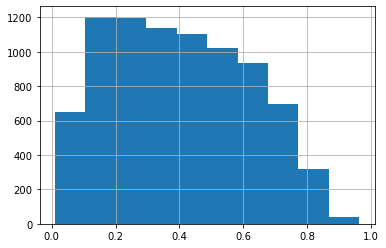

$$$  8301   1318
total positive  1318
tp tn fp fn 0   1   0   0
year  1994 positive  0
actual len  17585
len of xtest  8620
hdhdhd before  223
len of xtrain  219
year   1995
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(8620,)
no of positive  3401
len of predy  1792


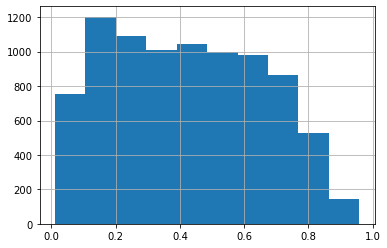

$$$  8620   1792
total positive  1792
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  18277
len of xtest  8999
hdhdhd before  223
len of xtrain  217
year   1996
[1979 1991 1992 1993 1994 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7564990564990566
(8999,)
no of positive  3245
len of predy  1545


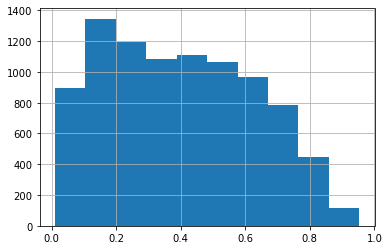

$$$  8999   1545
total positive  1545
tp tn fp fn 0   1   0   1
year  1996 positive  1
actual len  18933
len of xtest  9261
hdhdhd before  223
len of xtrain  219
year   1997
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(9261,)
no of positive  3201
len of predy  1478


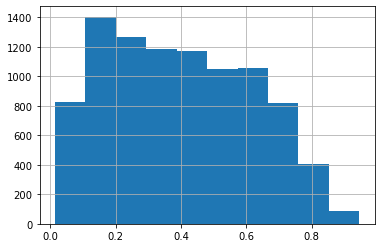

$$$  9261   1478
total positive  1478
tp tn fp fn 0   0   0   0
year  1997 positive  0
actual len  19596
len of xtest  9510
hdhdhd before  223
len of xtrain  213
year   1998
[1979 1991 1992 1993 1994 1996 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7798054723054724
(9510,)
no of positive  2677
len of predy  1014


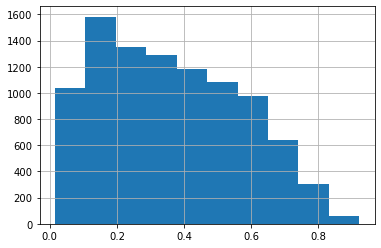

$$$  9510   1014
total positive  1014
tp tn fp fn 2   3   0   1
year  1998 positive  3
actual len  20269
len of xtest  9903
hdhdhd before  223
len of xtrain  215
year   1999
[1979 1991 1992 1993 1994 1996 1998 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7677358752358752
(9903,)
no of positive  3123
len of predy  1414


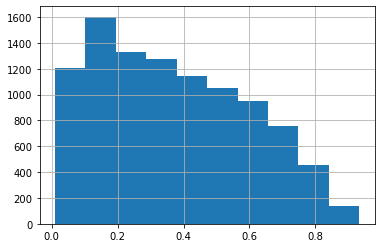

$$$  9903   1414
total positive  1414
tp tn fp fn 0   0   2   2
year  1999 positive  2
actual len  21025
len of xtest  10331
hdhdhd before  223
len of xtrain  213
year   2000
[1979 1991 1992 1993 1994 1996 1998 1999 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7761341436341437
(10331,)
no of positive  3646
len of predy  1750


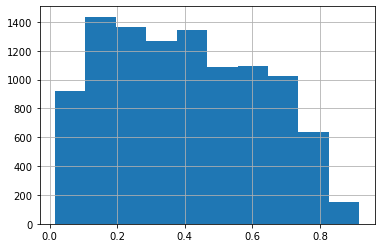

$$$  10331   1750
total positive  1750
tp tn fp fn 0   2   1   3
year  2000 positive  3
actual len  21961
len of xtest  10713
hdhdhd before  223
len of xtrain  219
year   2001
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(10713,)
no of positive  3198
len of predy  1228


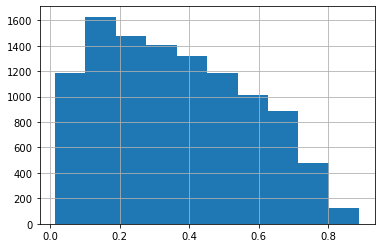

$$$  10713   1228
total positive  1228
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  22884
len of xtest  11183
hdhdhd before  223
len of xtrain  219
year   2002
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(11183,)
no of positive  3810
len of predy  1930


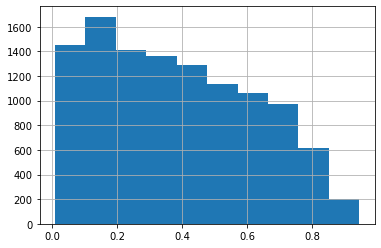

$$$  11183   1930
total positive  1930
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  23708
len of xtest  11586
hdhdhd before  223
len of xtrain  217
year   2003
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7628590853590854
(11586,)
no of positive  3356
len of predy  1269


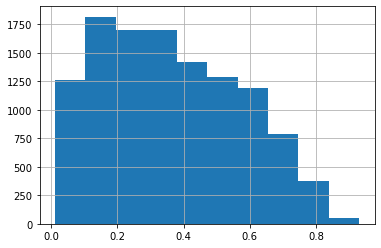

$$$  11586   1269
total positive  1269
tp tn fp fn 1   0   1   0
year  2003 positive  1
actual len  24651
len of xtest  12088
hdhdhd before  223
len of xtrain  219
year   2004
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(12088,)
no of positive  3931
len of predy  1855


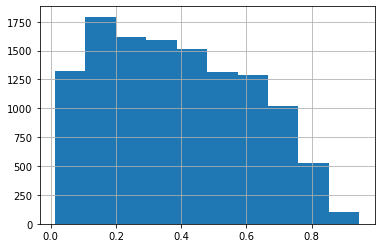

$$$  12088   1855
total positive  1855
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  25639
len of xtest  12545
hdhdhd before  223
len of xtrain  219
year   2005
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(12545,)
no of positive  4167
len of predy  2008


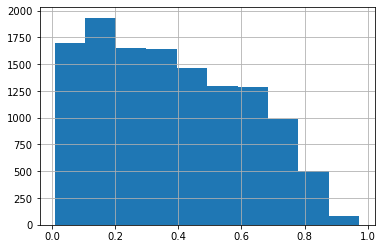

$$$  12545   2008
total positive  2008
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  26791
len of xtest  13090
hdhdhd before  223
len of xtrain  218
year   2006
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7582628482628484
(13090,)
no of positive  4730
len of predy  2289


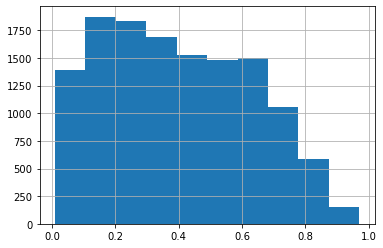

$$$  13090   2289
total positive  2289
tp tn fp fn 1   0   0   0
year  2006 positive  1
actual len  27781
len of xtest  13582
hdhdhd before  223
len of xtrain  213
year   2007
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7740345765345766
(13582,)
no of positive  4452
len of predy  1959


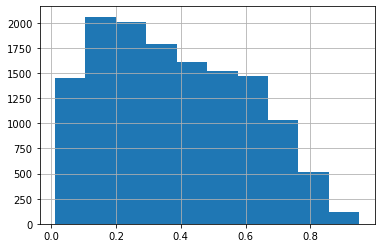

$$$  13582   1959
total positive  1959
tp tn fp fn 2   2   1   1
year  2007 positive  3
actual len  28867
len of xtest  14108
hdhdhd before  223
len of xtrain  211
year   2008
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7652444777444778
(14108,)
no of positive  4212
len of predy  1729


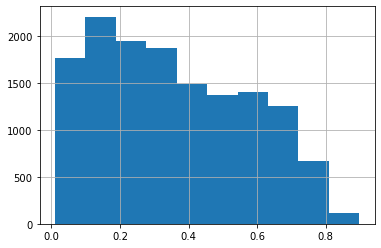

$$$  14108   1729
total positive  1729
tp tn fp fn 1   4   0   3
year  2008 positive  4
actual len  30063
len of xtest  14615
hdhdhd before  223
len of xtrain  207
year   2009
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7686383061383062
(14615,)
no of positive  5132
len of predy  2509


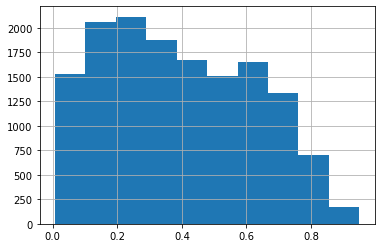

$$$  14615   2509
total positive  2509
tp tn fp fn 2   4   2   4
year  2009 positive  6
actual len  31270
len of xtest  15236
hdhdhd before  223
len of xtrain  203
year   2010
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7799514374514375
(15236,)
no of positive  4654
len of predy  1925


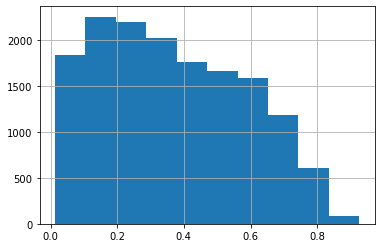

$$$  15236   1925
total positive  1925
tp tn fp fn 2   7   1   6
year  2010 positive  8
actual len  32548
len of xtest  15809
hdhdhd before  223
len of xtrain  195
year   2011
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7706604506604507
(15809,)
no of positive  5551
len of predy  2875


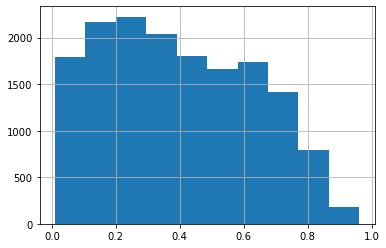

$$$  15809   2875
total positive  2875
tp tn fp fn 5   6   5   8
year  2011 positive  13
actual len  33915
len of xtest  16449
hdhdhd before  223
len of xtrain  193
year   2012
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.762330724830725
(16449,)
no of positive  6271
len of predy  3331


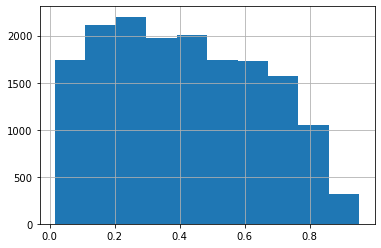

$$$  16449   3331
total positive  3331
tp tn fp fn 9   7   5   5
year  2012 positive  14
actual len  35502
len of xtest  17100
hdhdhd before  223
len of xtrain  194
year   2013
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7672261072261073
(17100,)
no of positive  5487
len of predy  1865


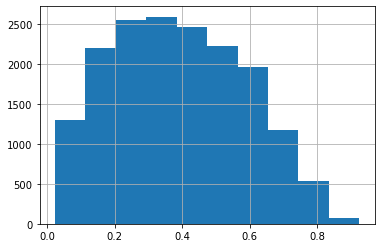

$$$  17100   1865
total positive  1865
tp tn fp fn 6   6   6   7
year  2013 positive  13
actual len  37143
len of xtest  17754
hdhdhd before  223
len of xtrain  202
year   2014
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 2018 2019 2020]
cv score  0.7744572094572095
(17754,)
no of positive  6350
len of predy  3403


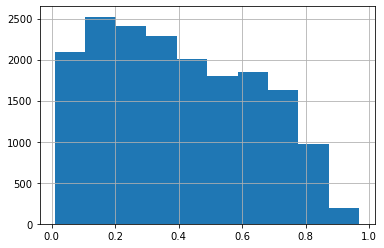

$$$  17754   3403
total positive  3403
tp tn fp fn 7   4   4   2
year  2014 positive  9
actual len  38964
len of xtest  18492
hdhdhd before  223
len of xtrain  213
year   2015
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 2018 2019 2020]
cv score  0.7592010767010767
(18492,)
no of positive  5545
len of predy  2490


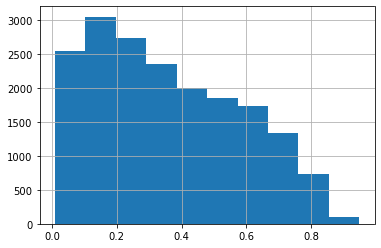

$$$  18492   2490
total positive  2490
tp tn fp fn 1   2   1   2
year  2015 positive  3
actual len  40764
len of xtest  19130
hdhdhd before  223
len of xtrain  211
year   2016
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018 2019 2020]
cv score  0.770487012987013
(19130,)
no of positive  4435
len of predy  1391


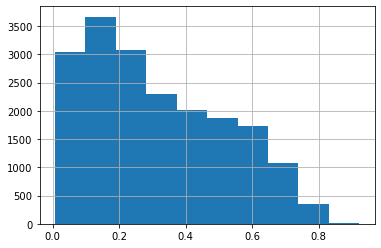

$$$  19130   1391
total positive  1391
tp tn fp fn 0   4   0   4
year  2016 positive  4
actual len  42532
len of xtest  19886
hdhdhd before  223
len of xtrain  207
year   2017
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018 2019 2020]
cv score  0.7549314574314574
(19886,)
no of positive  6105
len of predy  3082


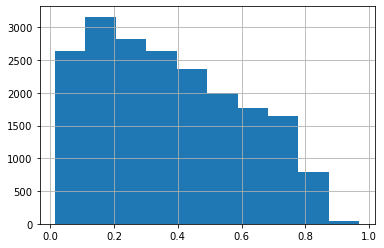

$$$  19886   3082
total positive  3082
tp tn fp fn 4   4   2   2
year  2017 positive  6
actual len  44336
len of xtest  20517
hdhdhd before  223
len of xtrain  203
year   2018
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020]
cv score  0.7876262626262626
(20517,)
no of positive  3783
len of predy  777


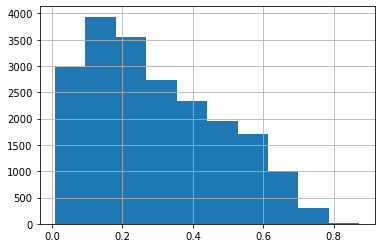

$$$  20517   777
total positive  777
tp tn fp fn 0   6   2   8
year  2018 positive  8
actual len  46374
len of xtest  21201
hdhdhd before  223
len of xtrain  209
year   2019
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2020]
cv score  0.7940981240981241
(21201,)
no of positive  6166
len of predy  2733


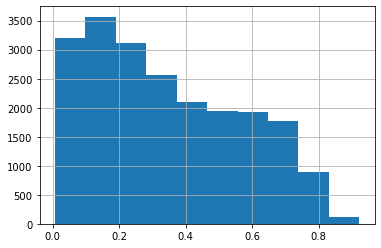

$$$  21201   2733
total positive  2733
tp tn fp fn 2   5   0   3
year  2019 positive  5
actual len  48945
len of xtest  22230
hdhdhd before  223
len of xtrain  215
year   2020
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7608871683871683
(22230,)
no of positive  5119
len of predy  1454


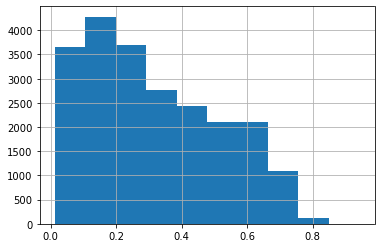

$$$  22230   1454
total positive  1454
tp tn fp fn 0   2   0   2
year  2020 positive  2
total pos  113  true pos  46  total false pos  1499.3488372093022


In [6]:
##logistic regression


def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] > th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] > th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    
    
    y_train = np.array(y_train)
 
    model = svm.SVC(C= 10,kernel='rbf')
    model.probability = True
    model.fit(x_train,y_train)
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    #x_test = x_test[x_test['rcr_hi'] >= 2.55]
    #x_test = x_test[x_test['cited_by_clin'] >= 0.10]
    #x_test = x_test[x_test['is_clinical'] >= 0.012] ##this one
    #x_test = x_test[x_test['animal'] >= 0.02]

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin'], axis=1)
    
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.65]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] > 0.65]))
    a, b,c = recall(copy_test,0.65, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)